## Problem Statement

## Import All Libraries Required For This Projects

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
import os
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler


from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor

import scipy.stats as sm

## Load Dataset

In [2]:
df = pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## About Features

### Input Features Handling

### Target Feature

## Data Analysis:EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings']
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

## Univariate Analysis

### Sex

In [5]:
df['Sex'].unique()   # Male, Female, Infant

array(['M', 'F', 'I'], dtype=object)

In [6]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

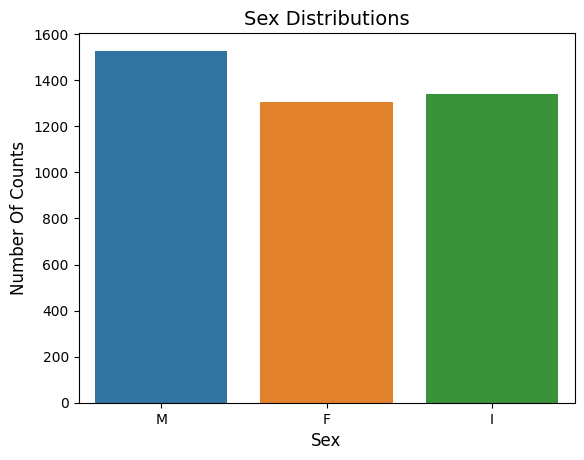

In [7]:
sns.countplot(x=df['Sex'])
plt.title("Sex Distributions",fontsize=14)
plt.xlabel('Sex',fontsize=12)
plt.ylabel('Number Of Counts',fontsize=12)
plt.show()

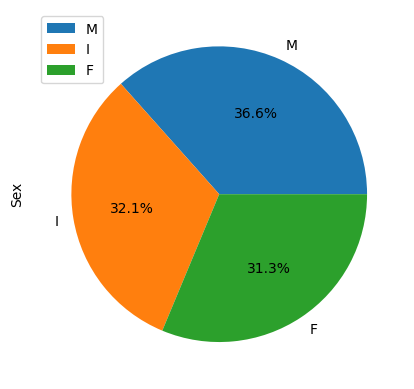

In [8]:
# Pie Plot
df['Sex'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.legend()
plt.show()

## Statistics of Numerical Features

In [9]:
d = pd.DataFrame(columns=['Minimum','Maximum','Mean','Median','Mode','Standard_Deviation','Variance','25%_Quantile','75%_Quantile'],
                index=['Length'])


for col in df.columns:
    if df[col].dtype==object:
        pass
    else:
        min1 = df[col].min()
        max1 = df[col].max()
        mean = df[col].mean()
        median = df[col].mean()
        mode = df[col].mean()
        std = df[col].std()
        var = df[col].var()
        q_25 = df[col].quantile(0.25)
        q_75 = df[col].quantile(0.75)
        d.loc[col] = [min1,max1,mean,median, mode, std, var, q_25,q_75]

In [10]:
d

,Minimum,Maximum,Mean,Median,Mode,Standard_Deviation,Variance,25%_Quantile,75%_Quantile
Length,0.075,0.815,0.523992,0.523992,0.523992,0.120093,0.014422,0.45,0.615
Diameter,0.055,0.65,0.407881,0.407881,0.407881,0.09924,0.009849,0.35,0.48
Height,0.0,1.13,0.139516,0.139516,0.139516,0.041827,0.00175,0.115,0.165
Whole_weight,0.002,2.8255,0.828742,0.828742,0.828742,0.490389,0.240481,0.4415,1.153
Shucked_weight,0.001,1.488,0.359367,0.359367,0.359367,0.221963,0.049268,0.186,0.502
Viscera_weight,0.0005,0.76,0.180594,0.180594,0.180594,0.109614,0.012015,0.0935,0.253
Shell_weight,0.0015,1.005,0.238831,0.238831,0.238831,0.139203,0.019377,0.13,0.329
Rings,1.0,29.0,9.933684,9.933684,9.933684,3.224169,10.395266,8.0,11.0


### Length

In [11]:
df['Length'].describe()

count    4177.000000
mean        0.523992
std         0.120093
min         0.075000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length, dtype: float64

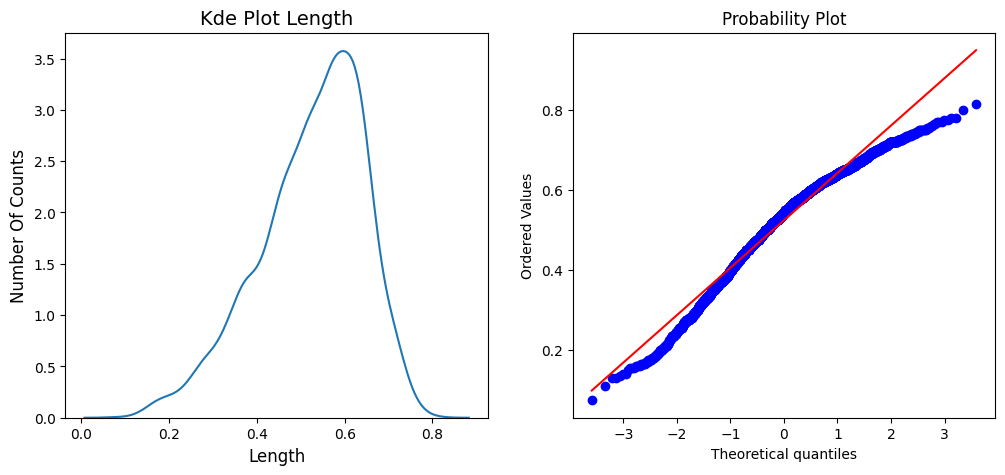

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(df['Length'])    # Longest shell measurement
plt.title("Kde Plot Length",fontsize=14)
plt.xlabel('Length',fontsize=12)
plt.ylabel('Number Of Counts',fontsize=12)
plt.subplot(1,2,2)
sm.probplot(df['Length'],dist='norm',plot=plt)
plt.show()

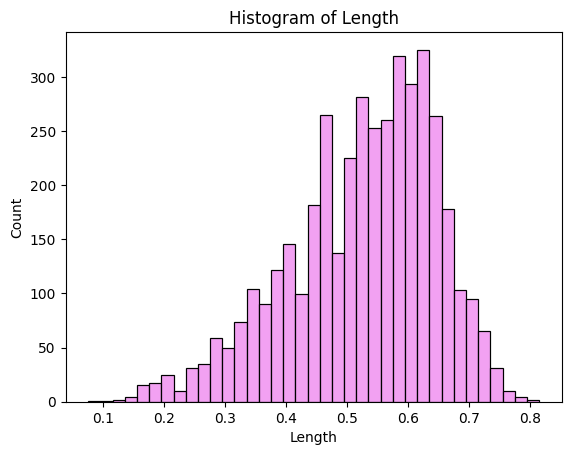

In [13]:
sns.histplot(x=df['Length'],color='Violet')
plt.title("Histogram of Length")
plt.show()

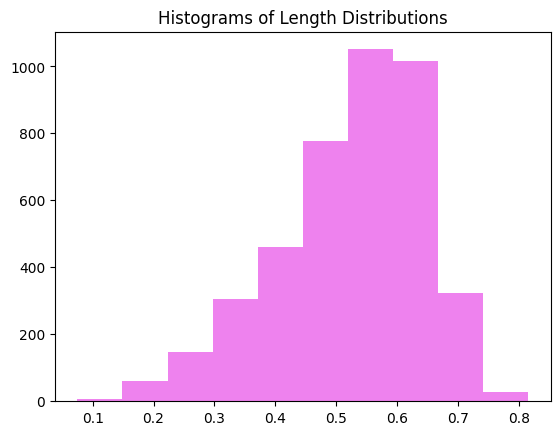

In [14]:
plt.hist(df['Length'],color='Violet')
plt.title("Histograms of Length Distributions")
plt.show()

### Diameter

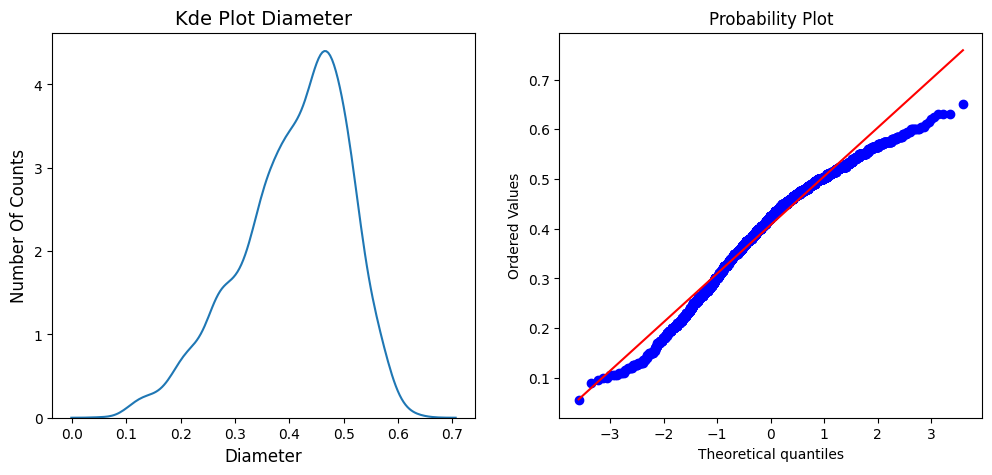

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(df['Diameter'])    
plt.title("Kde Plot Diameter",fontsize=14)
plt.xlabel('Diameter',fontsize=12)
plt.ylabel('Number Of Counts',fontsize=12)
plt.subplot(1,2,2)
sm.probplot(df['Diameter'],dist='norm',plot=plt)
plt.show()

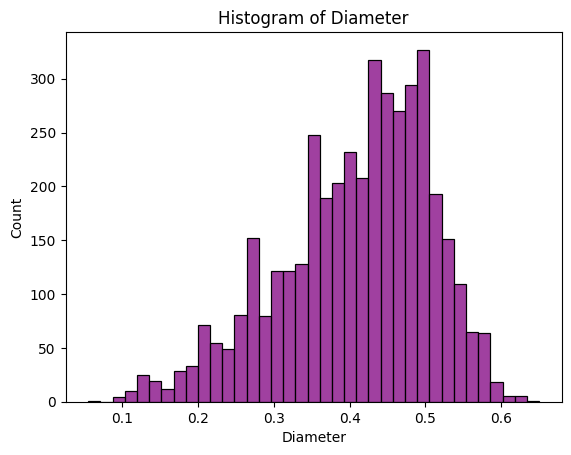

In [16]:
sns.histplot(x=df['Diameter'],color='Purple')
plt.title("Histogram of Diameter")
plt.show()

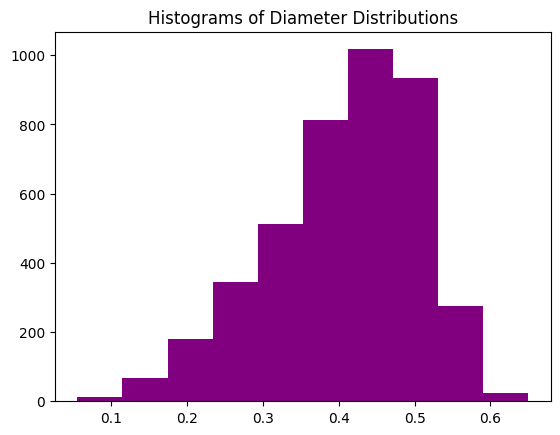

In [17]:
plt.hist(df['Diameter'],color='Purple')
plt.title("Histograms of Diameter Distributions")
plt.show()

### Height

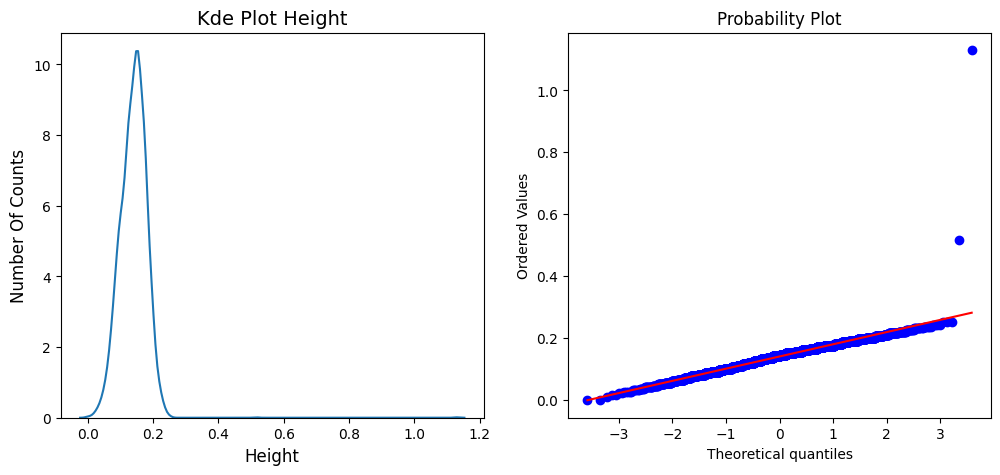

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(df['Height'])    
plt.title("Kde Plot Height",fontsize=14)
plt.xlabel('Height',fontsize=12)
plt.ylabel('Number Of Counts',fontsize=12)
plt.subplot(1,2,2)
sm.probplot(df['Height'],dist='norm',plot=plt)
plt.show()

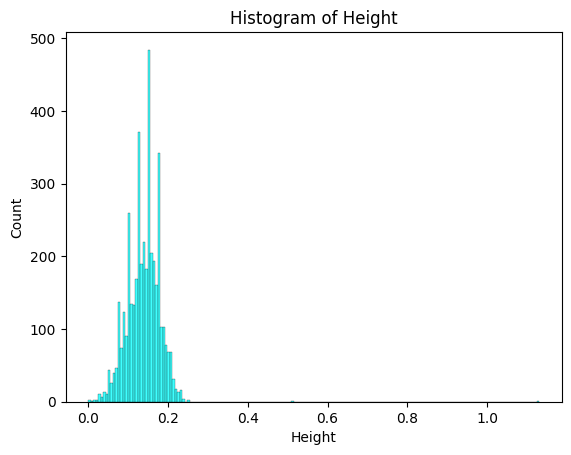

In [19]:
sns.histplot(x=df['Height'],color='Cyan')
plt.title("Histogram of Height")
plt.show()

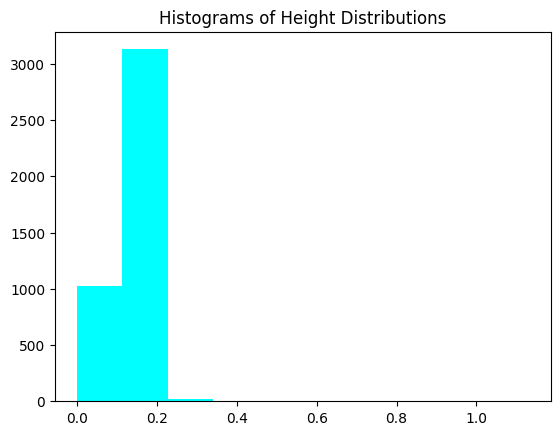

In [20]:
plt.hist(df['Height'],color='Cyan')
plt.title("Histograms of Height Distributions")
plt.show()

### Whole_weight

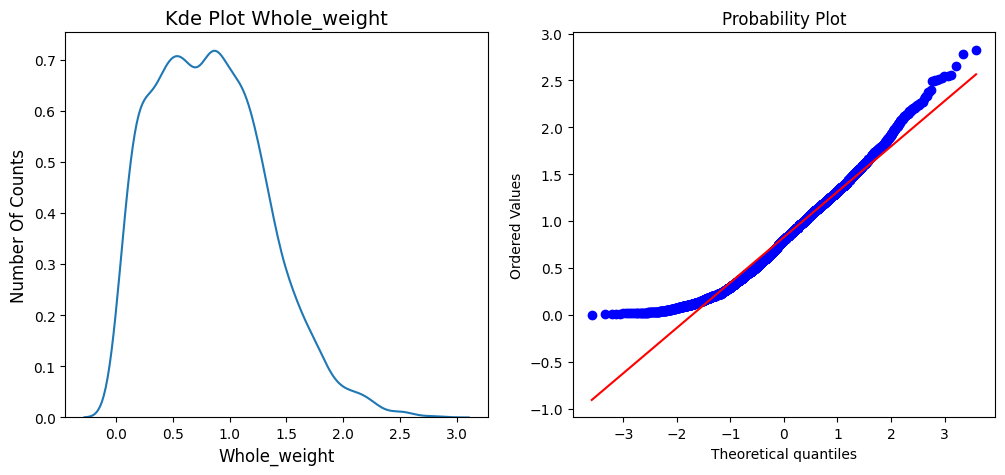

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(df['Whole_weight'])    
plt.title("Kde Plot Whole_weight",fontsize=14)
plt.xlabel('Whole_weight',fontsize=12)
plt.ylabel('Number Of Counts',fontsize=12)
plt.subplot(1,2,2)
sm.probplot(df['Whole_weight'],dist='norm',plot=plt)
plt.show()

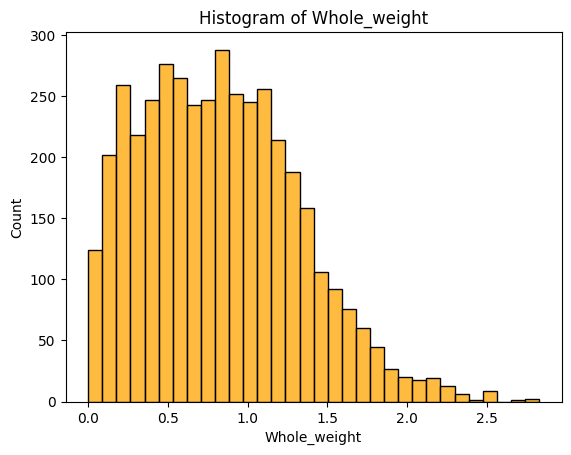

In [22]:
sns.histplot(x=df['Whole_weight'],color='Orange')
plt.title("Histogram of Whole_weight")
plt.show()

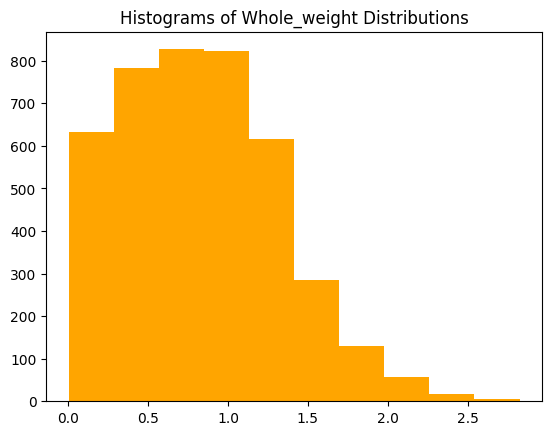

In [23]:
plt.hist(df['Whole_weight'],color='Orange')
plt.title("Histograms of Whole_weight Distributions")
plt.show()

### Shucked_weight

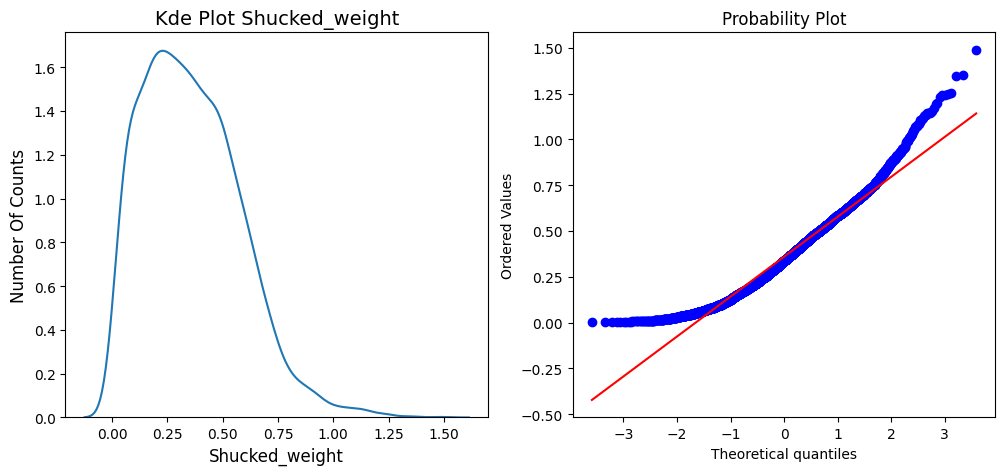

In [24]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(df['Shucked_weight'])    
plt.title("Kde Plot Shucked_weight",fontsize=14)
plt.xlabel('Shucked_weight',fontsize=12)
plt.ylabel('Number Of Counts',fontsize=12)
plt.subplot(1,2,2)
sm.probplot(df['Shucked_weight'],dist='norm',plot=plt)
plt.show()

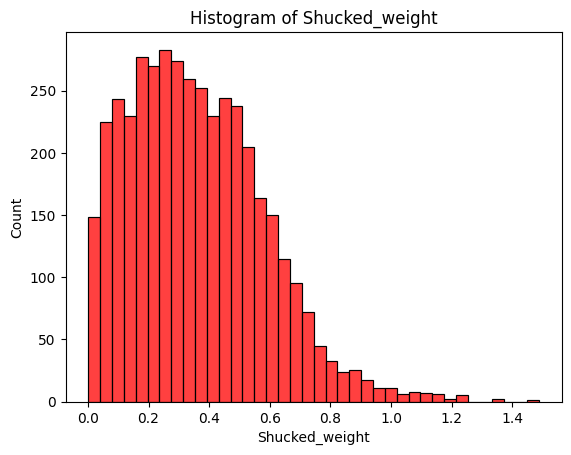

In [25]:
sns.histplot(x=df['Shucked_weight'],color='Red')
plt.title("Histogram of Shucked_weight")
plt.show()

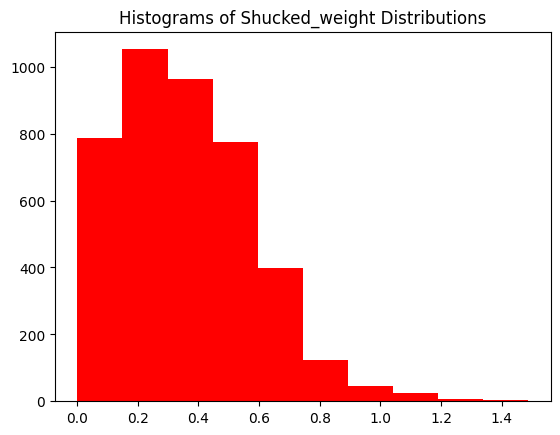

In [26]:
plt.hist(df['Shucked_weight'],color='Red')
plt.title("Histograms of Shucked_weight Distributions")
plt.show()

### Viscera_weight

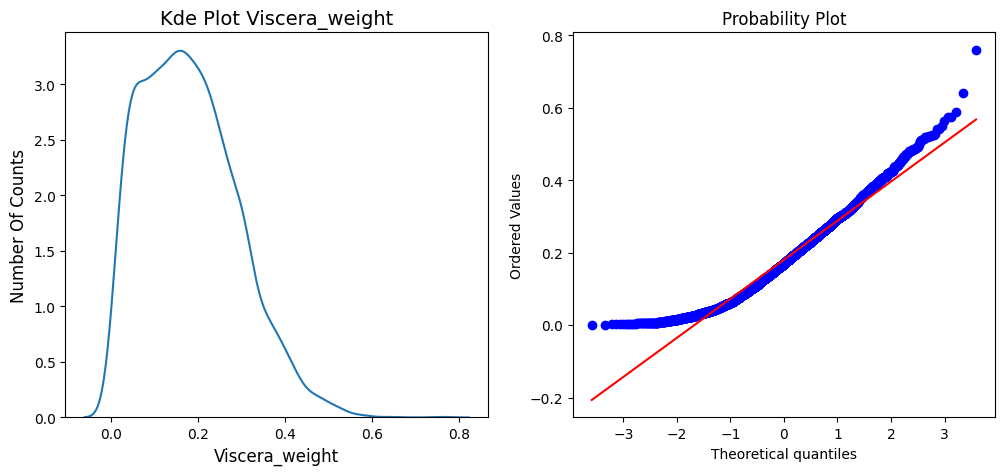

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(df['Viscera_weight'])    
plt.title("Kde Plot Viscera_weight",fontsize=14)
plt.xlabel('Viscera_weight',fontsize=12)
plt.ylabel('Number Of Counts',fontsize=12)
plt.subplot(1,2,2)
sm.probplot(df['Viscera_weight'],dist='norm',plot=plt)
plt.show()

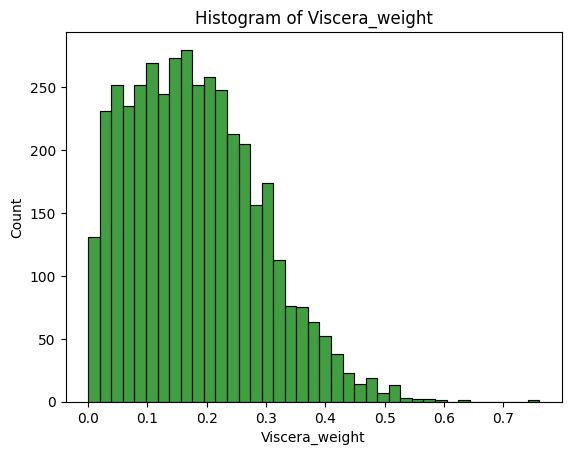

In [28]:
sns.histplot(x=df['Viscera_weight'],color='Green')
plt.title("Histogram of Viscera_weight")
plt.show()

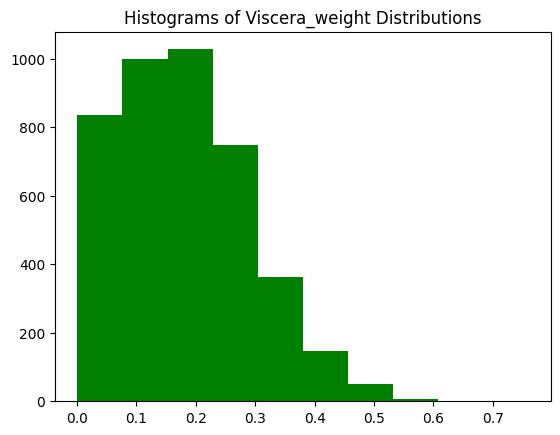

In [29]:
plt.hist(df['Viscera_weight'],color='Green')
plt.title("Histograms of Viscera_weight Distributions")
plt.show()

### Shell_weight

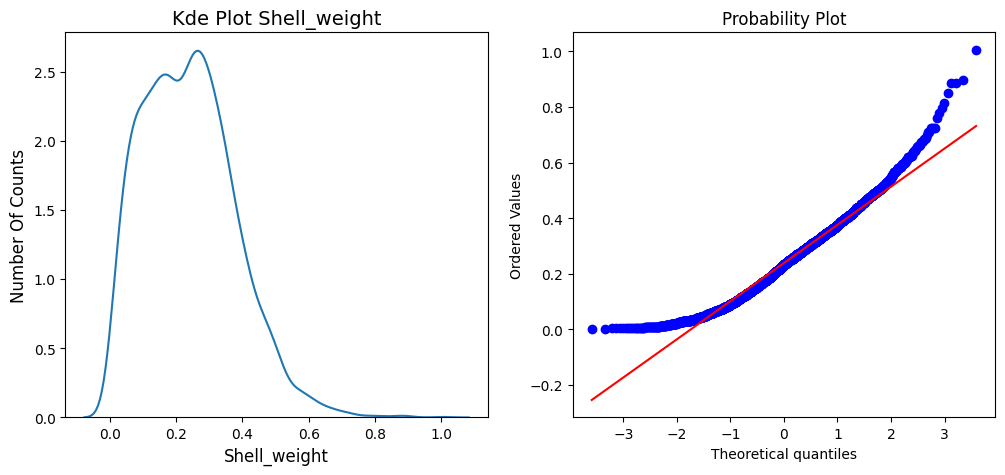

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(df['Shell_weight'])    
plt.title("Kde Plot Shell_weight",fontsize=14)
plt.xlabel('Shell_weight',fontsize=12)
plt.ylabel('Number Of Counts',fontsize=12)
plt.subplot(1,2,2)
sm.probplot(df['Shell_weight'],dist='norm',plot=plt)
plt.show()

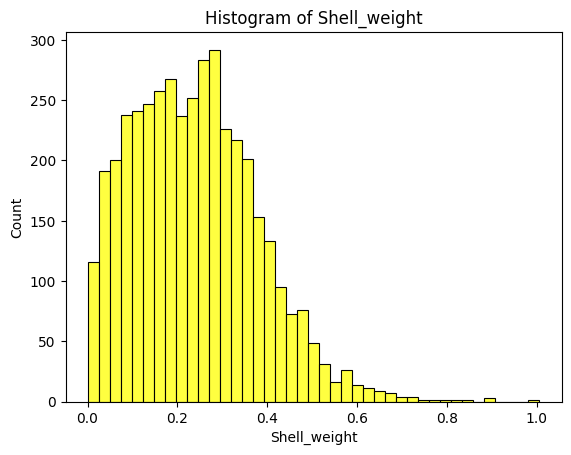

In [31]:
sns.histplot(x=df['Shell_weight'],color='Yellow')
plt.title("Histogram of Shell_weight")
plt.show()

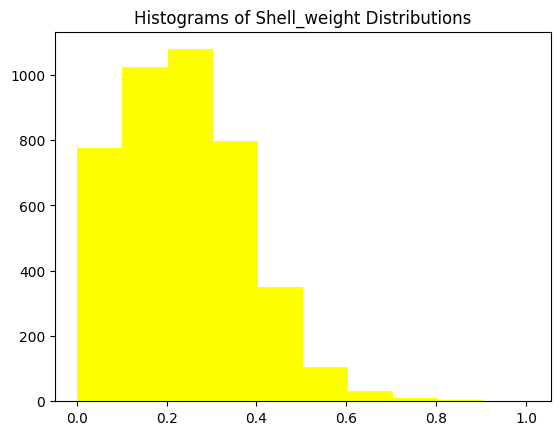

In [32]:
plt.hist(df['Shell_weight'],color='Yellow')
plt.title("Histograms of Shell_weight Distributions")
plt.show()

### Target Feature Rings

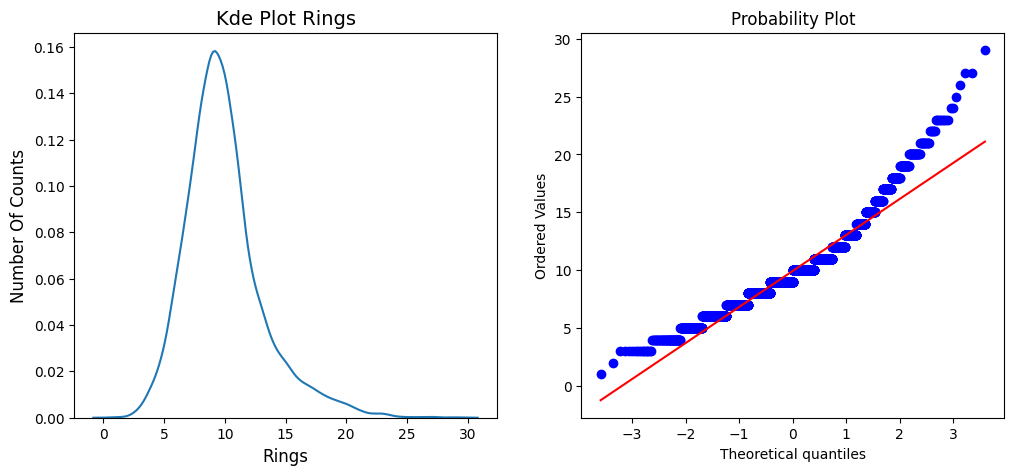

In [33]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(df['Rings'])    
plt.title("Kde Plot Rings",fontsize=14)
plt.xlabel('Rings',fontsize=12)
plt.ylabel('Number Of Counts',fontsize=12)
plt.subplot(1,2,2)
sm.probplot(df['Rings'],dist='norm',plot=plt)
plt.show()

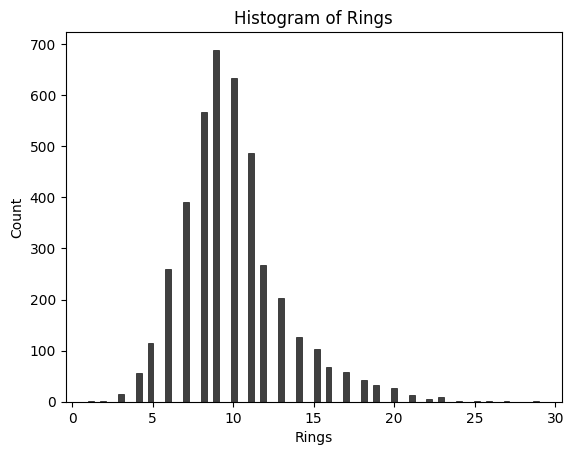

In [34]:
sns.histplot(x=df['Rings'],color='Black')
plt.title("Histogram of Rings")
plt.show()

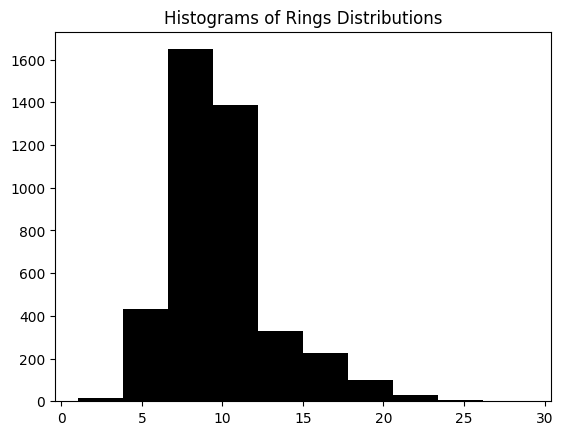

In [35]:
plt.hist(df['Rings'],color='Black')
plt.title("Histograms of Rings Distributions")
plt.show()

In [36]:
df['Rings'].describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

In [37]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

## Bivariate Analysis

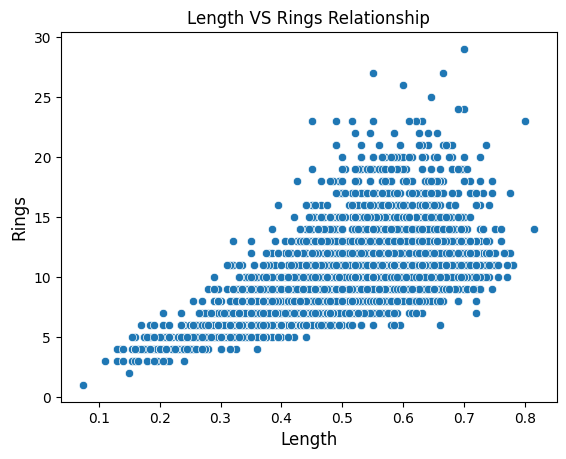

In [38]:
sns.scatterplot(x=df['Length'],y=df['Rings'])
plt.title("Length VS Rings Relationship",fontsize=12)
plt.xlabel('Length',fontsize=12)
plt.ylabel('Rings',fontsize=12)
plt.show()

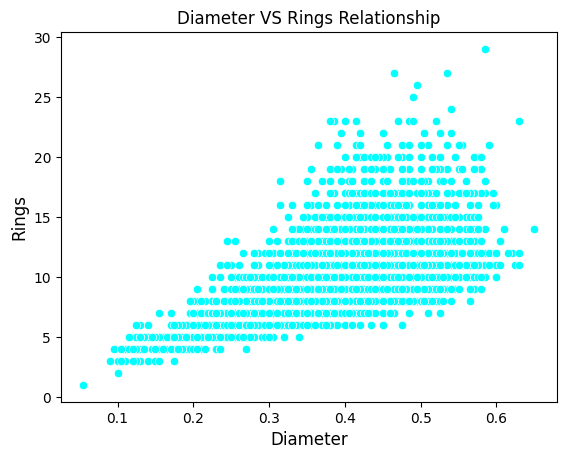

In [39]:
sns.scatterplot(x=df['Diameter'],y=df['Rings'],color='Cyan')
plt.title("Diameter VS Rings Relationship",fontsize=12)
plt.xlabel('Diameter',fontsize=12)
plt.ylabel('Rings',fontsize=12)
plt.show()

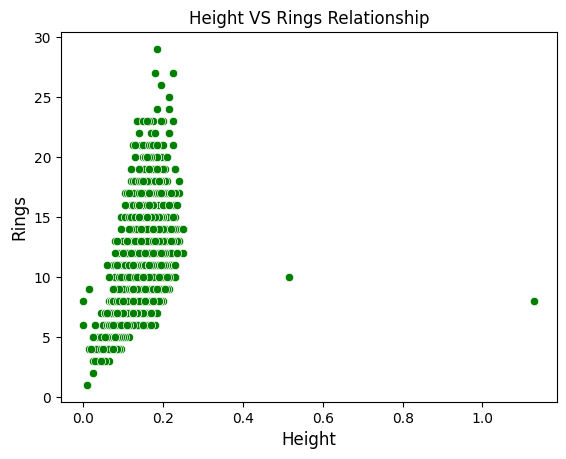

In [40]:
sns.scatterplot(x=df['Height'],y=df['Rings'],color='Green')
plt.title("Height VS Rings Relationship",fontsize=12)
plt.xlabel('Height',fontsize=12)
plt.ylabel('Rings',fontsize=12)
plt.show()

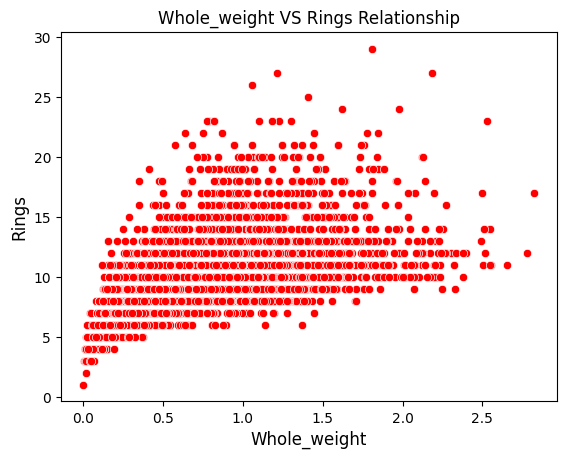

In [41]:
sns.scatterplot(x=df['Whole_weight'],y=df['Rings'],color='Red')
plt.title("Whole_weight VS Rings Relationship",fontsize=12)
plt.xlabel('Whole_weight',fontsize=12)
plt.ylabel('Rings',fontsize=12)
plt.show()

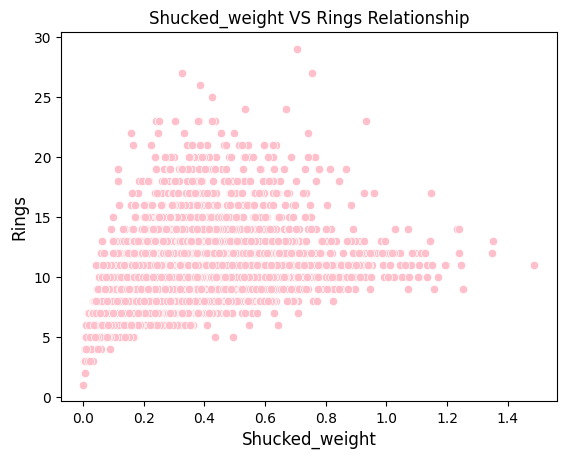

In [42]:
sns.scatterplot(x=df['Shucked_weight'],y=df['Rings'],color='Pink')
plt.title("Shucked_weight VS Rings Relationship",fontsize=12)
plt.xlabel('Shucked_weight',fontsize=12)
plt.ylabel('Rings',fontsize=12)
plt.show()

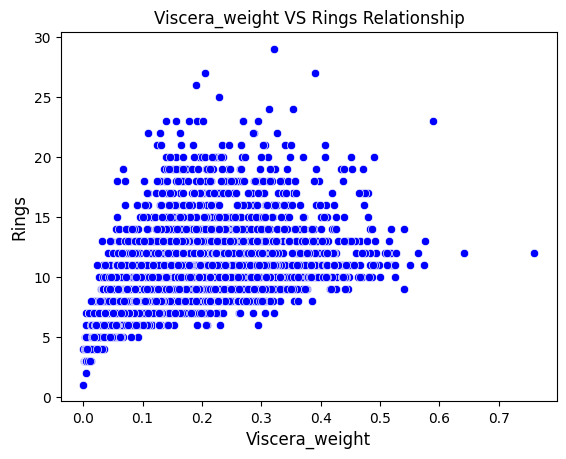

In [43]:
sns.scatterplot(x=df['Viscera_weight'],y=df['Rings'],color='Blue')
plt.title("Viscera_weight VS Rings Relationship",fontsize=12)
plt.xlabel('Viscera_weight',fontsize=12)
plt.ylabel('Rings',fontsize=12)
plt.show()

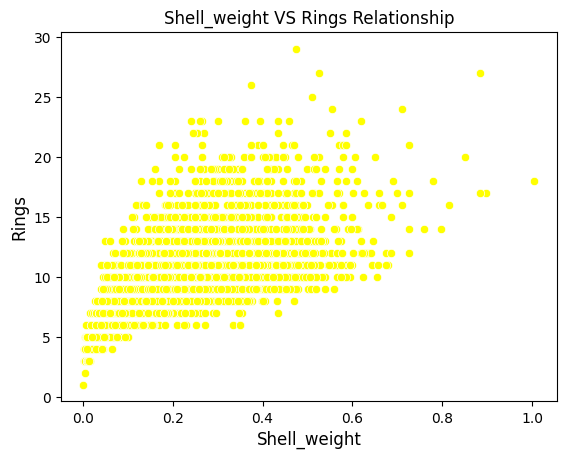

In [44]:
sns.scatterplot(x=df['Shell_weight'],y=df['Rings'],color='Yellow')
plt.title("Shell_weight VS Rings Relationship",fontsize=12)
plt.xlabel('Shell_weight',fontsize=12)
plt.ylabel('Rings',fontsize=12)
plt.show()

## Handling Categorical Data

In [45]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [46]:
df['Sex'] = df['Sex'].replace({'F':0,'M':1,'I':2})

In [47]:
df['Sex'].unique()

array([1, 0, 2], dtype=int64)

## Multivariate Analysis

In [48]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [49]:
cor = df.corr()
cor

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Sex,1.000000,-0.503697,-0.516450,-0.477850,-0.501511,-0.459731,-0.505693,-0.499103,-0.401445
Length,-0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,-0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,-0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,-0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,-0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


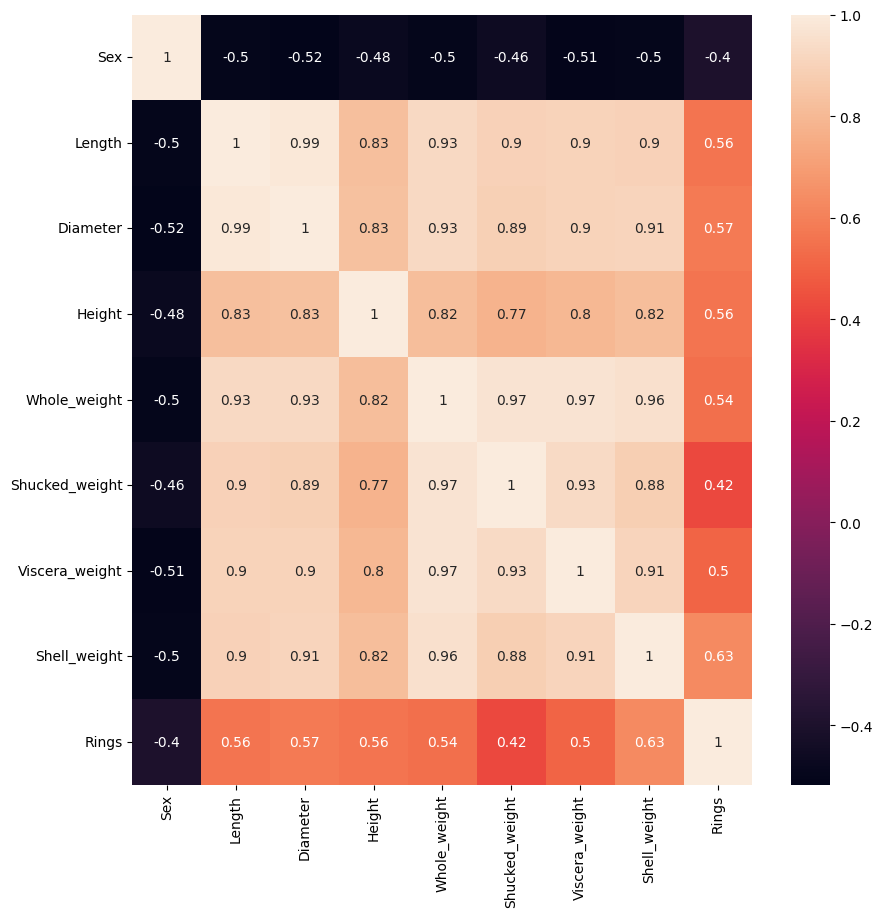

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True)
plt.show()

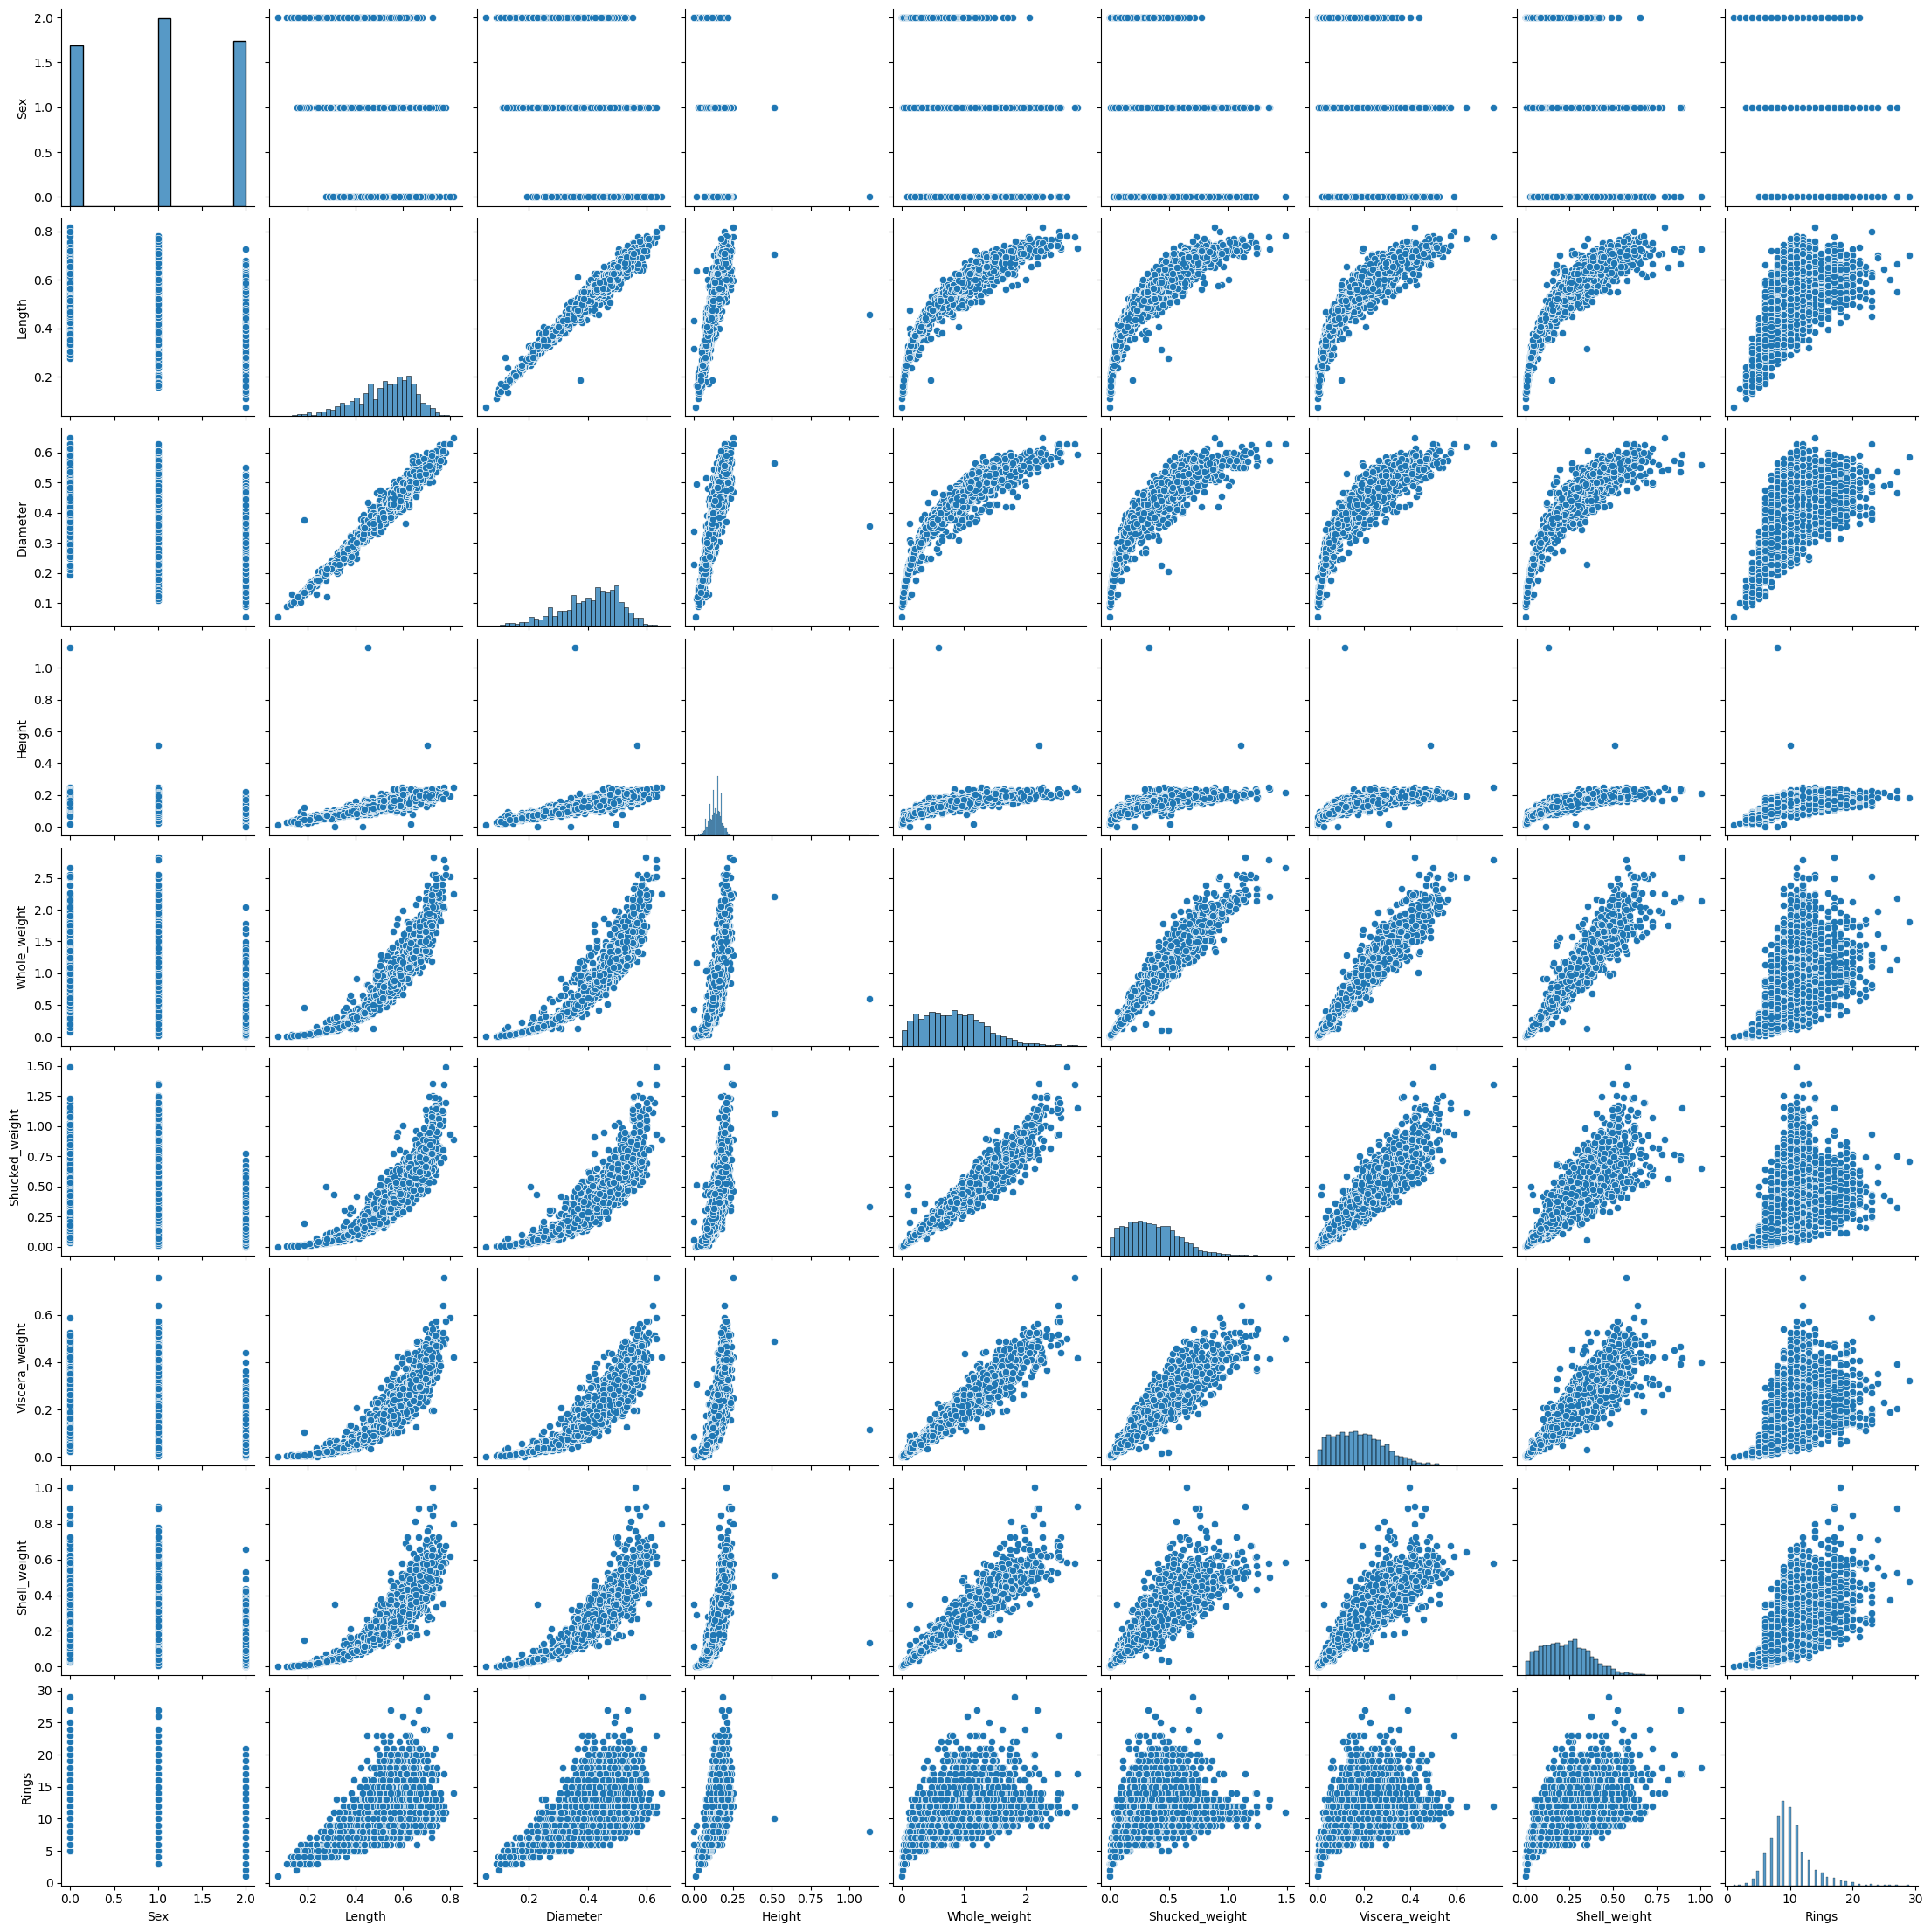

In [51]:
sns.pairplot(df);

## Features Engineering

In [52]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Checking Skewness

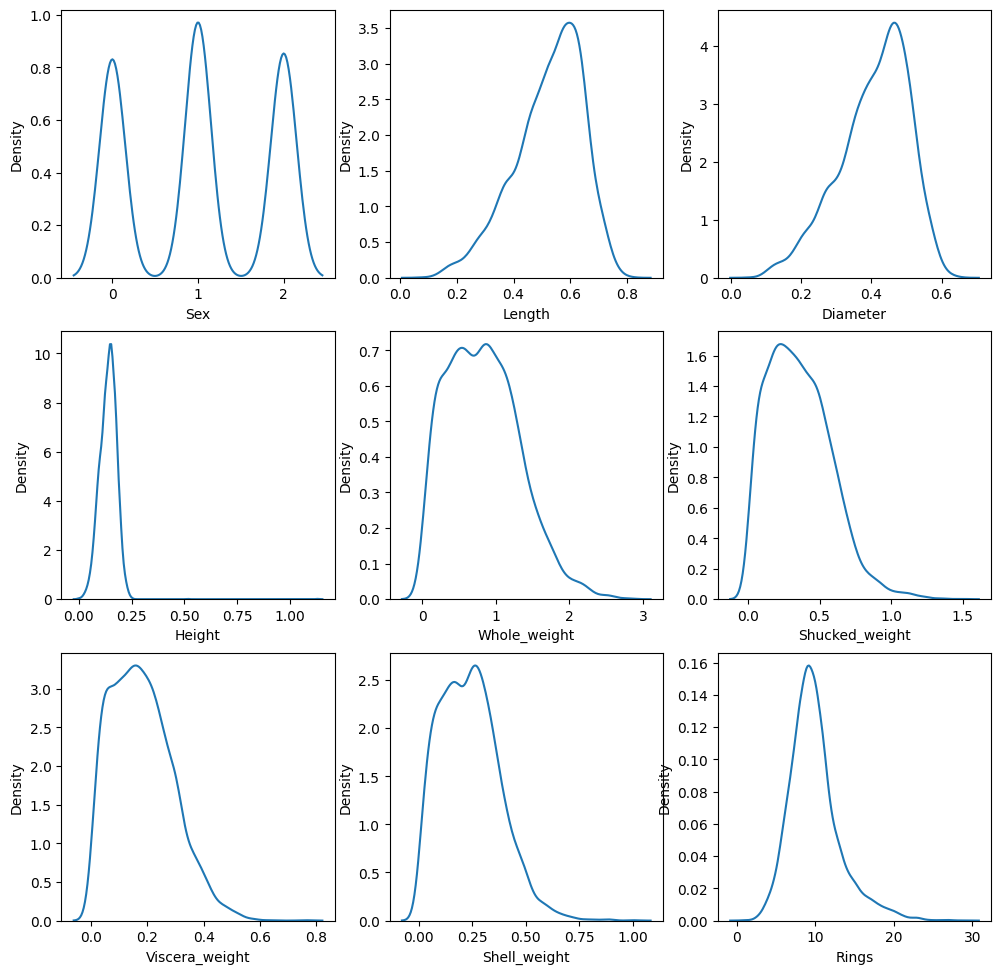

In [53]:
plt.figure(figsize=(12,16))
i=1
for col in df.columns:
    plt.subplot(4,3,i)
    sns.kdeplot(df[col])
    i+=1

In [54]:
df.skew()

Sex              -0.014980
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole_weight      0.530959
Shucked_weight    0.719098
Viscera_weight    0.591852
Shell_weight      0.620927
Rings             1.114102
dtype: float64

## Detecting Outliers

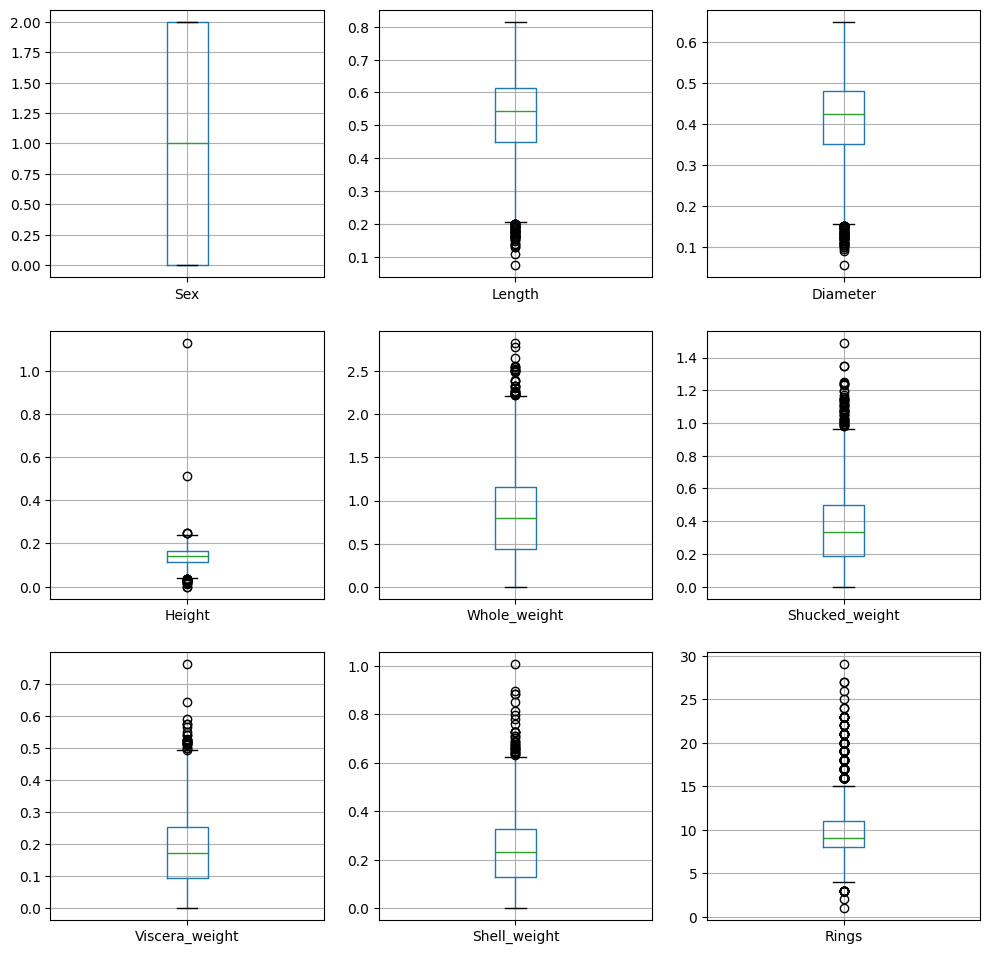

In [55]:
plt.figure(figsize=(12,16))
i=1
for col in df.columns:
    plt.subplot(4,3,i)
    df[[col]].boxplot()
    i+=1

## Split The Data

In [56]:
x = df.drop('Rings',axis=1)
y = df['Rings']

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.02,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4093, 8)
(84, 8)
(4093,)
(84,)


In [58]:
x_train.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
3518,1,0.710,0.570,0.195,1.3480,0.8985,0.4435,0.4535
1685,2,0.620,0.450,0.135,0.9240,0.3580,0.2265,0.2965
100,2,0.360,0.265,0.095,0.2315,0.1050,0.0460,0.0750
1337,1,0.580,0.460,0.155,1.4395,0.6715,0.2730,0.2955
881,1,0.655,0.520,0.165,1.4095,0.5860,0.2910,0.4050


In [59]:
y_train

3518    11
1685    10
100      7
1337    10
881      9
        ..
704      9
2187    14
580     11
4122     8
2605     9
Name: Rings, Length: 4093, dtype: int64

## Scale The Data

In [60]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [61]:
x_train_scaled = pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
x_train_scaled

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.5,0.858108,0.865546,0.172566,0.476713,0.603564,0.583278,0.450424
1,1.0,0.736486,0.663866,0.119469,0.326545,0.240081,0.297564,0.293971
2,1.0,0.385135,0.352941,0.084071,0.081282,0.069939,0.059908,0.073244
3,0.5,0.682432,0.680672,0.137168,0.509120,0.450908,0.358789,0.292975
4,0.5,0.783784,0.781513,0.146018,0.498495,0.393410,0.382488,0.402093
...,...,...,...,...,...,...,...,...
4088,0.5,0.439189,0.411765,0.110619,0.146981,0.127774,0.117841,0.115595
4089,0.5,0.567568,0.554622,0.119469,0.223659,0.133826,0.160632,0.257598
4090,0.0,0.743243,0.731092,0.154867,0.435984,0.373571,0.324556,0.362232
4091,1.0,0.520270,0.521008,0.097345,0.158491,0.117350,0.133641,0.147982


In [62]:
x_test_scaled

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.0,0.709459,0.714286,0.146018,0.401098,0.304304,0.354839,0.332337
1,0.5,0.554054,0.529412,0.137168,0.342129,0.281103,0.322581,0.234180
2,0.5,0.851351,0.840336,0.190265,0.757570,0.703093,0.503621,0.524664
3,0.5,0.716216,0.731092,0.123894,0.344785,0.281103,0.270573,0.312407
4,1.0,0.628378,0.638655,0.128319,0.342837,0.287492,0.289006,0.261584
...,...,...,...,...,...,...,...,...
79,0.5,0.675676,0.663866,0.146018,0.325660,0.219570,0.295589,0.253612
80,0.0,0.635135,0.579832,0.123894,0.274836,0.246806,0.282423,0.177877
81,1.0,0.445946,0.420168,0.092920,0.127678,0.104573,0.092166,0.123069
82,0.0,0.581081,0.563025,0.106195,0.202054,0.171150,0.173799,0.143996


## Build Model

## LinearRegression

In [63]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(x_test_scaled)
y_pred = np.around(y_pred,2)
y_pred

array([12.18,  9.08, 11.03, 11.38,  9.65,  8.4 , 13.77,  8.52, 10.96,
        9.91,  9.81, 10.19, 10.58,  9.26, 12.  ,  5.99, 10.81, 10.88,
       13.  ,  9.6 , 12.25, 17.01,  7.  , 12.25,  8.93,  9.39,  9.39,
       12.84, 10.14,  8.75, 10.32,  7.97, 11.87,  8.67,  8.55, 10.17,
        8.11,  9.1 ,  9.04, 11.24, 10.36,  7.97,  6.49, 10.83, 11.14,
       10.37, 14.56, 12.08, 11.08,  8.89, 10.76, 10.79,  8.87,  7.06,
        7.64,  9.39,  9.81,  8.99, 10.25,  9.53,  8.38,  8.87, 14.72,
       13.  , 17.71,  9.15,  9.7 ,  9.07,  9.19,  7.2 ,  5.16,  9.48,
        7.77, 10.34,  8.35, 10.31, 12.42,  9.43,  7.55, 11.81,  8.71,
        8.02,  9.33,  7.41])

In [65]:
y_test.values

array([10,  9, 11, 10, 17,  9, 12,  8, 11,  9, 11, 11, 12, 11, 10,  6, 10,
       11, 13,  9, 11, 21,  6, 13, 10,  9, 11, 12, 11, 13,  9,  7, 17, 12,
        7,  9,  8, 10,  8, 12, 17,  9,  7, 11, 12,  8, 10, 11,  8,  7, 11,
        8,  8,  6,  8, 10, 12, 11,  8, 11,  7, 10, 10,  8, 25, 11,  9,  7,
        9,  8,  4, 14,  8, 12,  7,  8, 11, 15,  8, 12,  9, 10,  8,  5],
      dtype=int64)

In [66]:
print('----Model Evaluation On Test Data----')
print()
print(f"MAE : {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 Score : {r2_score(y_test,y_pred)}")

print('-----------------------------------------------')
## For Train Data
y_pred_tr = model.predict(x_train_scaled)

print('----Model Evaluation On Train Data----')
print()
print(f"MAE : {mean_absolute_error(y_train,y_pred_tr)}")
print(f"MSE: {mean_squared_error(y_train,y_pred_tr)}")
print(f"R2 Score : {r2_score(y_train,y_pred_tr)}")

----Model Evaluation On Test Data----

MAE : 1.6891666666666665
MSE: 5.576070238095237
R2 Score : 0.4513199140960563
-----------------------------------------------
----Model Evaluation On Train Data----

MAE : 1.5879714738750927
MSE: 4.834766388178952
R2 Score : 0.5349559526464467


## RandomForestRegressor

In [67]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [68]:
y_pred = rf_model.predict(x_test)
y_pred = np.around(y_pred,2)
y_pred

array([10.56,  8.8 , 11.22, 11.88, 10.01,  8.87, 13.41,  8.1 , 11.39,
       10.51, 13.1 , 10.27, 10.46, 10.75, 11.05,  5.43, 11.43, 10.44,
       14.71, 11.31, 11.28, 15.91,  7.16, 11.42,  9.33,  8.62, 10.32,
       13.24, 10.43,  8.98,  9.74,  8.7 , 12.38,  9.81,  8.26,  9.57,
        8.09,  9.4 ,  8.69, 11.35, 11.84,  8.62,  6.25, 10.46, 11.53,
        9.65, 16.22, 11.74, 11.8 ,  8.12, 10.8 ,  9.8 ,  8.11,  6.3 ,
        7.26, 10.75,  9.01,  8.61,  9.71,  9.13,  7.93,  8.58, 14.35,
       11.14, 15.3 , 10.93,  9.85,  8.34,  9.34,  6.76,  4.  , 10.08,
        7.12, 11.66,  9.24,  9.11, 12.54, 11.02,  6.67, 12.92,  8.5 ,
        8.37,  8.18,  7.89])

In [69]:
y_test.values

array([10,  9, 11, 10, 17,  9, 12,  8, 11,  9, 11, 11, 12, 11, 10,  6, 10,
       11, 13,  9, 11, 21,  6, 13, 10,  9, 11, 12, 11, 13,  9,  7, 17, 12,
        7,  9,  8, 10,  8, 12, 17,  9,  7, 11, 12,  8, 10, 11,  8,  7, 11,
        8,  8,  6,  8, 10, 12, 11,  8, 11,  7, 10, 10,  8, 25, 11,  9,  7,
        9,  8,  4, 14,  8, 12,  7,  8, 11, 15,  8, 12,  9, 10,  8,  5],
      dtype=int64)

In [70]:
print('----Model Evaluation On Test Data----')
print()
print(f"MAE : {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 Score : {r2_score(y_test,y_pred)}")

print('-----------------------------------------------')
## For Train Data
y_pred_tr = rf_model.predict(x_train)

print('----Model Evaluation On Train Data----')
print()
print(f"MAE : {mean_absolute_error(y_train,y_pred_tr)}")
print(f"MSE: {mean_squared_error(y_train,y_pred_tr)}")
print(f"R2 Score : {r2_score(y_train,y_pred_tr)}")

----Model Evaluation On Test Data----

MAE : 1.5827380952380952
MSE: 5.40415357142857
R2 Score : 0.4682363529871145
-----------------------------------------------
----Model Evaluation On Train Data----

MAE : 0.5640850232103592
MSE: 0.6424153432689959
R2 Score : 0.9382076800967496


## Hyperparameter Tunning Random Forest Regression

In [71]:
rf_model = RandomForestRegressor()

param_grid = {'n_estimators':np.arange(50,200),
    'criterion':["squared_error", "absolute_error", "friedman_mse", "poisson"],
    'max_depth':np.arange(2,25),
    'min_samples_split':np.arange(2,25),
    'min_samples_leaf':np.arange(2,25)}

rscv_rf_model = RandomizedSearchCV(rf_model,param_grid, cv=5)
rscv_rf_model.fit(x_train,y_train)
rscv_rf_model.best_estimator_

RandomForestRegressor(max_depth=9, min_samples_leaf=20, min_samples_split=12,
                      n_estimators=164)

In [72]:
new_rf_model = rscv_rf_model.best_estimator_

y_pred = new_rf_model.predict(x_test)
y_pred = np.around(y_pred,2)
y_pred

array([11.33,  8.99, 11.49, 11.73, 10.54,  9.01, 14.52,  8.16, 11.63,
       10.4 , 10.19, 10.39, 10.94, 10.41, 10.86,  5.11, 11.56, 10.96,
       13.68,  9.82, 11.3 , 15.44,  7.28, 11.21,  9.05,  9.04,  9.82,
       13.52, 10.37,  8.86,  9.74,  8.79, 12.4 ,  9.62,  8.54,  9.09,
        8.39,  9.19,  8.95, 11.57, 10.76,  8.71,  6.43, 10.76, 11.23,
        9.52, 15.52, 12.6 , 11.54,  8.49, 10.61,  9.7 ,  8.58,  6.6 ,
        7.41, 10.36,  9.28,  9.3 , 10.03,  8.92,  8.17,  8.6 , 15.27,
       11.47, 16.17, 10.87, 10.19,  9.04,  9.27,  6.83,  4.11, 10.17,
        6.89, 11.1 ,  9.28,  9.09, 14.05, 10.12,  6.92, 12.03,  8.91,
        8.36,  8.14,  7.14])

In [73]:
y_test.values

array([10,  9, 11, 10, 17,  9, 12,  8, 11,  9, 11, 11, 12, 11, 10,  6, 10,
       11, 13,  9, 11, 21,  6, 13, 10,  9, 11, 12, 11, 13,  9,  7, 17, 12,
        7,  9,  8, 10,  8, 12, 17,  9,  7, 11, 12,  8, 10, 11,  8,  7, 11,
        8,  8,  6,  8, 10, 12, 11,  8, 11,  7, 10, 10,  8, 25, 11,  9,  7,
        9,  8,  4, 14,  8, 12,  7,  8, 11, 15,  8, 12,  9, 10,  8,  5],
      dtype=int64)

In [74]:
print('----Model Evaluation On Test Data----')
print()
print(f"MAE : {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 Score : {r2_score(y_test,y_pred)}")

print('-----------------------------------------------')
## For Train Data
y_pred_tr = new_rf_model.predict(x_train)

print('----Model Evaluation On Train Data----')
print()
print(f"MAE : {mean_absolute_error(y_train,y_pred_tr)}")
print(f"MSE: {mean_squared_error(y_train,y_pred_tr)}")
print(f"R2 Score : {r2_score(y_train,y_pred_tr)}")

----Model Evaluation On Test Data----

MAE : 1.6144047619047615
MSE: 5.497491666666667
R2 Score : 0.459051971885982
-----------------------------------------------
----Model Evaluation On Train Data----

MAE : 1.353091241510713
MSE: 3.740273342477905
R2 Score : 0.6402324923811507


In [75]:
new_rf_model.feature_importances_

array([0.02670117, 0.0129862 , 0.02157668, 0.01719723, 0.04004637,
       0.15630468, 0.01662912, 0.70855856])

In [76]:
features_imp = pd.Series(new_rf_model.feature_importances_,index=x_train.columns)
features_imp

Sex               0.026701
Length            0.012986
Diameter          0.021577
Height            0.017197
Whole_weight      0.040046
Shucked_weight    0.156305
Viscera_weight    0.016629
Shell_weight      0.708559
dtype: float64

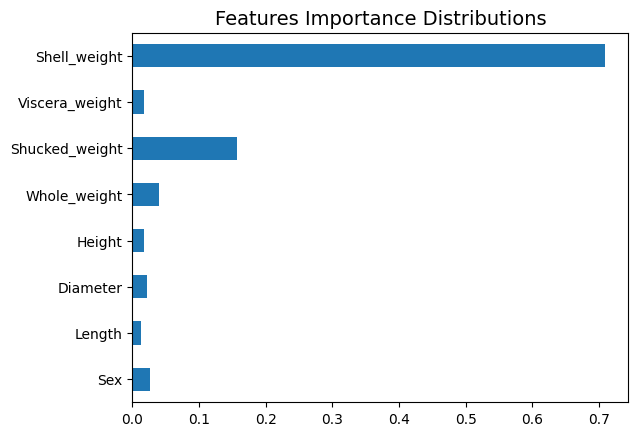

In [77]:
features_imp.plot(kind='barh')
plt.title('Features Importance Distributions',fontsize=14)
plt.show()

In [78]:
xgb_model = XGBRegressor()
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [79]:
y_pred = xgb_model.predict(x_test)
y_pred = np.around(y_pred,2)
y_pred

array([10.33,  7.48, 10.67, 11.05, 11.68,  8.37, 14.25,  7.47, 11.01,
        9.74, 13.92,  9.5 , 10.69, 10.  , 10.13,  5.34, 10.4 , 10.88,
       14.42, 10.03, 10.71, 14.26,  7.8 , 11.66, 10.3 ,  9.18, 10.42,
       14.47, 11.71,  8.71,  8.74,  9.14, 12.19, 10.63,  8.17,  8.98,
        7.96,  9.59,  8.92, 11.71, 11.7 ,  9.23,  6.16,  9.82, 11.13,
        8.68, 18.39, 10.44, 12.06,  8.32, 11.58,  9.88,  8.08,  6.55,
        7.33, 10.55,  9.3 ,  8.53,  9.88,  8.72,  8.39,  8.58, 16.99,
       11.56, 15.12, 12.49, 10.1 ,  8.87,  9.25,  6.72,  4.61,  8.3 ,
        7.06,  9.5 ,  9.13,  8.49, 11.56, 10.47,  6.99, 13.34,  8.96,
        8.69,  7.28,  8.  ], dtype=float32)

In [80]:
print('----Model Evaluation On Test Data----')
print()
print(f"MAE : {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 Score : {r2_score(y_test,y_pred)}")

print('-----------------------------------------------')
## For Train Data
y_pred_tr = xgb_model.predict(x_train)

print('----Model Evaluation On Train Data----')
print()
print(f"MAE : {mean_absolute_error(y_train,y_pred_tr)}")
print(f"MSE: {mean_squared_error(y_train,y_pred_tr)}")
print(f"R2 Score : {r2_score(y_train,y_pred_tr)}")

----Model Evaluation On Test Data----

MAE : 1.7203571909949893
MSE: 6.695153573236065
R2 Score : 0.34120316264916506
-----------------------------------------------
----Model Evaluation On Train Data----

MAE : 0.6425232069724759
MSE: 0.7875539733581322
R2 Score : 0.9242471594542155


## Save Model

In [81]:
new_rf_model

RandomForestRegressor(max_depth=9, min_samples_leaf=20, min_samples_split=12,
                      n_estimators=164)

In [82]:
scaler

MinMaxScaler()

In [83]:
with open('rf_model.pickle','wb') as file:
    pickle.dump(new_rf_model,file)
    
with open('scaler.pickle','wb') as file:
    pickle.dump(scaler,file)

In [84]:
features_dict = {'columns':list(x_train.columns),'Sex':{'Female':0,'Male':1,'Infant':2}}
features_dict

{'columns': ['Sex',
  'Length',
  'Diameter',
  'Height',
  'Whole_weight',
  'Shucked_weight',
  'Viscera_weight',
  'Shell_weight'],
 'Sex': {'Female': 0, 'Male': 1, 'Infant': 2}}

In [85]:
len(features_dict['columns'])

8

In [91]:
features_dict['columns']

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Shucked_weight',
 'Viscera_weight',
 'Shell_weight']

In [86]:
features_dict['Sex']['Female']

0

In [87]:
with open('features_data.json','w') as file:
    json.dump(features_dict,file)

In [88]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Taking User Inputs

In [89]:
import warnings
warnings.filterwarnings('ignore')

In [90]:
input_data = [1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15]
print('Input Data:',input_data)
print()
input_data_scaled = scaler.transform([input_data])
print("Scaled User Data:",input_data_scaled)
print()
pred = new_rf_model.predict(input_data_scaled)[0]
print(f"Predicted Age is: {pred:.2f} Yr")

Input Data: [1, 0.455, 0.365, 0.095, 0.514, 0.2245, 0.101, 0.15]

Scaled User Data: [[0.5        0.51351351 0.5210084  0.0840708  0.18133522 0.15030262
  0.1323239  0.14798206]]

Predicted Age is: 9.92 Yr
